# Homework 3: Arrays,  File I/O and Plotting

Please complete this homework assignment in code cells in the iPython notebook. Include comments in your code when necessary.  Please rename the notebook as SIS ID_HW03.ipynb (your student ID number) and save the notebook once you have executed it as a PDF  (note, that when saving as PDF you don't want to use the option with latex because it crashes, but rather the one to save it directly as a PDF). 

**The homework should be submitted on Gradescope under the Assignments tab (the .pdf file). Please label it by your student ID number (SIS ID)**

## Problem 1: Sunspots

[Adapted from Newman, Exercise 3.1] At <a href="http://www-personal.umich.edu/~mejn/computational-physics/sunspots.txt">this link</a> (and also in the current directory on datahub) you will find a file called `sunspots.txt`, which contains the observed number of sunspots on the Sun for each month since January 1749. The file contains two columns of numbers, the first being the month and the second being the sunspot number.

a. Write a program that reads in the data and makes a graph of sunspots as a function of time. Adjust the $x$ axis so that the data fills the whole horizontal width of the graph.

b. Modify your code to display two subplots in a single figure: The plot from Part 1 with all the data, and a second subplot with the first 1000 data points on the graph.

c. Write a function `running_average(y, r)` that takes an array or list $y$ and calculates the running average of the data, defined by 
$$ Y_k = \frac{1}{2r+1} \sum_{m=-r}^r y_{k+m},$$
where $y_k$ are the sunspot numbers in our case. Use this function and modify your second subplot (the one with the first 1000 data points) to plot both the original data and the running average on the same graph, again over the range covered by the first 1000 data points. Use $r=5$, but make sure your program allows the user to easily change $r$.

The next two parts may require you to google for how to do things. Make a strong effort to do these parts on your own without asking for help. If you do ask for help from a GSI or friend, first ask them to point you to the resource they used, and do your best to learn the necessary techniques from that resource yourself. Finding and learning from online documentation and forums is a very important skill. (Hint: Stack Exchange/Stack Overflow is often a great resource.)

d. Add legends to each of your subplots, but make them partially transparent, so that you can still see any data that they might overlap. *Note: In your program, you should only have to change $r$ for the running average in one place to adjust both the graph and the legend.*

e. Since the $x$ and $y$ axes in both subplots have the same units, add shared $x$ and $y$ labels to your plot that are centered on the horizontal and vertical dimensions of your figure, respectively. Also add a single title to your figure.

When your are finished, your plot should look something close to this:

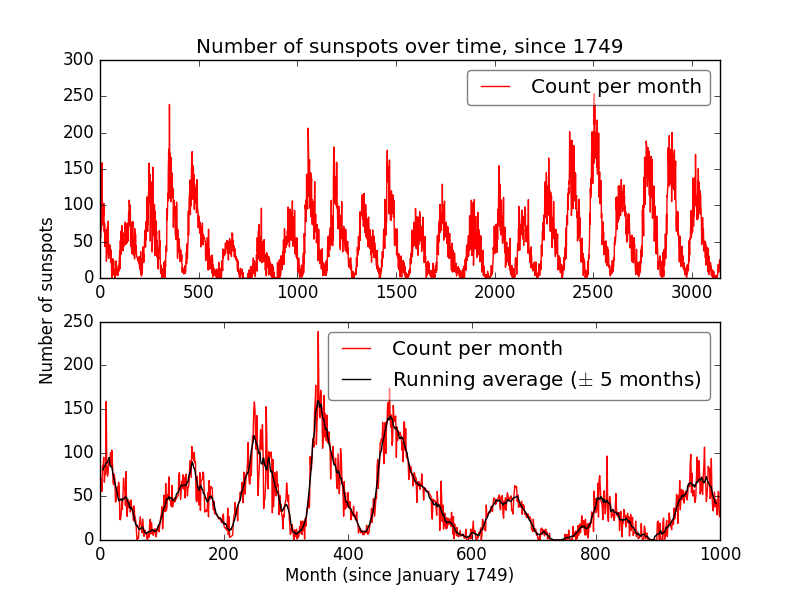

In [1]:
# Don't rerun this snippet of code.
# If you accidentally do, uncomment the lines below and rerun

from IPython.display import Image
Image(filename="img/p1_output.png")

#### Hints

* The running average is not defined for the first and last few points that you're taking a running average over. (Why is that?) Notice, for instance, that the black curve in the plot above doesn't extend quite as far on either side as the red curve. For making your plot, it might be helpful if your `running_average` function returns an array of the $x$-values $x_k$ (or their corresponding indices $k$) along with an array of the $y$-values $Y_k$ that you compute for the running average.

* You can use the Latex code `$\pm$` for the $\pm$ symbol in the legend. You can also just write `+/-` if you prefer.


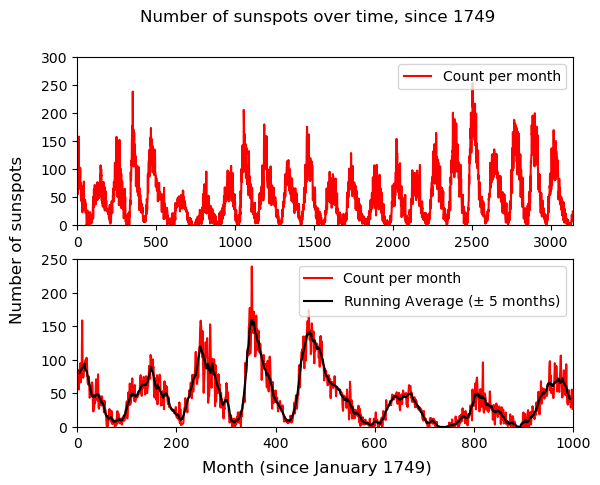

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def running_average(y: np.array, r: float) -> (np.array, np.array):
    X = np.array([i for i in range(r, 1000 - r)])
    Y = np.zeros(y.size - 2 * r)
    for i in range(r, y.size - r):
        index = i - r
        for j in range(-r, r + 1):
            Y[index] += y[i + j]
        Y[index] /= 2 * r + 1
    return X, Y

month = []
number = []
f = open('sunspots.txt')
for line in f:
    tokens = line.split()
    month.append(int(tokens[0]))
    number.append(float(tokens[1]))
f.close()

fig = plt.figure()
plt.subplot(2, 1, 1)
plt.plot(np.array(month), np.array(number), 'r-', label='Count per month')
plt.xlim(0, 3142)
plt.ylim(0, 300)
plt.legend(loc='upper right')

plt.subplot(2, 1, 2)
plt.plot(np.array(month)[:1000], np.array(number)[:1000], 'r-', label='Count per month')
month_ave, average = running_average(np.array(number[:1000]), 5)
plt.plot(month_ave, average, 'black', label='Running Average ($\pm$ 5 months)')
plt.plot()
plt.xlim(0, 1000)
plt.ylim(0, 250)
plt.legend(loc='upper right')

fig.suptitle("Number of sunspots over time, since 1749")
fig.supxlabel('Month (since January 1749)')
fig.supylabel('Number of sunspots')
plt.show()

# Problem 2: Cardiovascular Disease dataset


In this problem, we analyze a dataset from Kaggle
https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset?datasetId=107706&sortBy=dateRun&tab=bookmarked

(and also in the current directory on datahub as `cardio_train.csv`)

**Data description**
There are 3 types of input features:

- Objective: factual information;
- Examination: results of medical examination;
- Subjective: information given by the patient.

Features:

1. Age | Objective Feature | age | int (days)
2. Height | Objective Feature | height | int (cm) |
3. Weight | Objective Feature | weight | float (kg) |
4. Gender | Objective Feature | gender | categorical code |
5. Systolic blood pressure | Examination Feature | ap_hi | int |
6. Diastolic blood pressure | Examination Feature | ap_lo | int |
7. Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8. Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9. Smoking | Subjective Feature | smoke | binary |
10. Alcohol intake | Subjective Feature | alco | binary |
11. Physical activity | Subjective Feature | active | binary |
12. Presence or absence of cardiovascular disease | Target Variable | cardio | binary |
All of the dataset values were collected at the moment of medical examination.


In [3]:
# Display the first 10 lines of the file 'cardio_train.csv' using the 'head' command.
# Pay attention to the header (the first line in the printout)
# You will need to use the header to associate the position of entries to the quantity (age, blood pressure, etc.)
!head -n 10 cardio_train.csv


id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0;18393;2;168;62.0;110;80;1;1;0;0;1;0
1;20228;1;156;85.0;140;90;3;1;0;0;1;1
2;18857;1;165;64.0;130;70;3;1;0;0;0;1
3;17623;2;169;82.0;150;100;1;1;0;0;1;1
4;17474;1;156;56.0;100;60;1;1;0;0;0;0
8;21914;1;151;67.0;120;80;2;2;0;0;0;0
9;22113;1;157;93.0;130;80;3;1;0;0;1;0
12;22584;2;178;95.0;130;90;3;3;0;0;1;1
13;17668;1;158;71.0;110;70;1;1;0;0;1;0


The CSV file is delimited by semicolons (`;`). From the header, we can infer the following columns and their potential meanings:

- `id` - A unique identifier for each sample.
- `age` - Age of the individual (likely in days, given the large numbers).
- `gender` - Gender of the individual. The values are numeric, so we might need further information or analysis to determine which numbers correspond to which genders.
- `height` - Height of the individual, likely in centimeters.
- `weight` - Weight of the individual, possibly in kilograms.
- `ap_hi` - Systolic blood pressure.
- `ap_lo` - Diastolic blood pressure.
- `cholesterol` - Cholesterol level. This seems to be a categorical variable with numeric values.
- `gluc` - Glucose level. This also appears to be a categorical variable with numeric values.
- `smoke` - Whether the individual smokes or not. This is likely a binary variable (0 for non-smokers, 1 for smokers).
- `alco` - Whether the individual consumes alcohol or not. This is probably a binary variable as well.
- `active` - Whether the individual is physically active. Again, likely a binary variable.
- `cardio` - Whether the individual has a cardiovascular disease or not. This is presumably the target variable, and it is binary.

In [4]:
# Import the numpy library and alias it as 'np'
import numpy as np

# Use numpy's 'genfromtxt' function to read data from the file 'cardio_train.csv'
# 'delimiter' specifies that the data is separated by semicolons (';')
# 'skip_header=1' indicates that the first row (header) of the file should be skipped
data = np.genfromtxt('cardio_train.csv', delimiter=';', skip_header=1)

### Part 2.1: write a few lines to check the dimension, shape, and size of this numpy array

In [5]:
# Develop your code here.
shape = data.shape
print('dimention: %d' % len(shape))
print('shape:', shape)
print('size: ', data.size)

dimention: 2
shape: (70000, 13)
size:  910000


## Part 2.2: Produce the age distribution of this sample
- Draw the age in the unit of year. You can assume each year has exactly 365 days. 
    - Hint: Each entry on the axis 0 is a sample (a person). Their age data is one of the entries on axis 1. So you want to keep all the age entries regardless of the axis-0 position.  
    - the plot should be a histogram with a range of (30,70) and bins = 40
    - label the y and x axes properly. The x label should be 'Age [yr]', and the y label should be 'Entries'
- Calculate the mean and standard deviation of the age distribution, as well as the median age. 

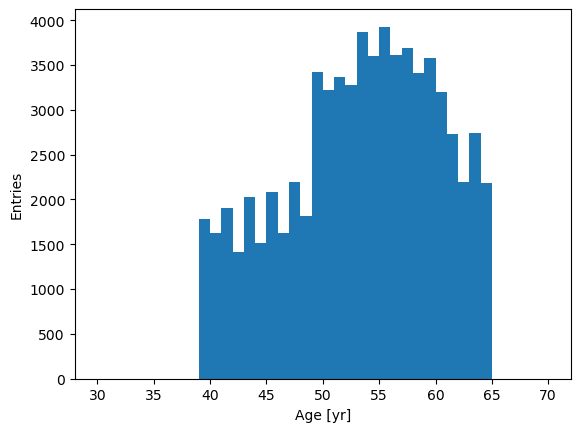

Mean age = 53.34
Standard deviation = 6.76
Median age = 53.98


In [6]:
# Develop your code here
ages = np.array([line[1] / 365 for line in data])

plt.figure()
plt.hist(ages, 40, (30, 70))
plt.xlabel('Age [yr]')
plt.ylabel('Entries')
plt.show()

print('Mean age = {:.2f}'.format(np.mean(ages)))
print('Standard deviation = {:.2f}'.format(np.std(ages)))
print('Median age = {:.2f}'.format(np.median(ages)))

## Part 2.3: BMI distribution 

BMI, or Body Mass Index, is a numerical value derived from an individual's weight and height. It is a commonly used tool to assess whether a person has a healthy body weight for their height. BMI is calculated using the following formula:

$\large \mathrm{BMI} =\frac{weight}{height^2} $

where the units of weight and height are kilogram and meter, respectively

**Part 2.3.1:Produce the BMI distribution of this sample**

- This requires you obtain the weight and height from the data numpy array. Each of these two quantities are corresponding to entries on the axis 1 of the numpy array `data`. To get the weight and height, you can follow the procedure established for Part 2 of this problem.  
- Make sure you convert the unit of height data properly. The formula is valid for height in meters, while the numpy array contains height data in cm
- You can use 40 bins with a range of 10 to 50 for the histogram
- What is the largest BMI value from this dataset? (I leave it to you to google search how to find the maximum value of a numpy array)

**Part 2.3.2: what is the fraction of the samples that have a BMI smaller than 25?**
- hints: first, you need to know the total number of samples in this dataset. That number is the number of entries on axis 0 of `data`. Second, you need to apply a selection that only keeps the entries of `data` or your BMI numpy array where the BMI value is smaller than 25. You may consult the lecture notebook of September 13, 2023 if you don't have an idea for this.

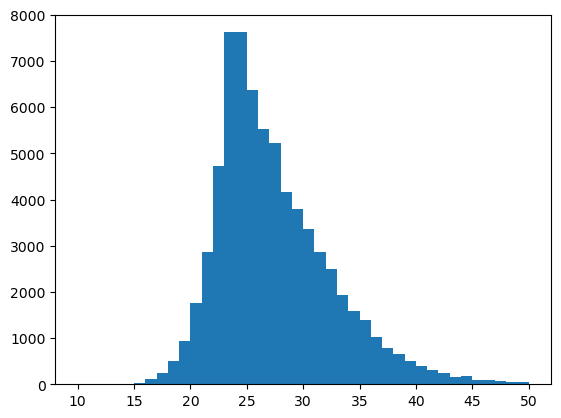

The largest BMI value from this dataset is 298.67.
The fraction of the samples that have a BMI smaller than 25 is 0.3777.


In [7]:
weights = np.array([line[4] for line in data])
heights = np.array([line[3] / 100 for line in data])
bmis = weights / heights ** 2

plt.figure()
plt.hist(bmis, 40, (10, 50))
plt.show()

print('The largest BMI value from this dataset is {:.2f}.'.format(bmis.max()))
print('The fraction of the samples that have a BMI smaller than 25 is {:.4f}.'.format(bmis[bmis < 25].size / shape[0]))